In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load red wine data
data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)
X = data[:, :-1]
y = data[:, -1]


# split data into training and testing sets
from sklearn.model_selection import train_test_split
tr_X, te_X, tr_Y, te_Y = train_test_split(X, y, test_size=0.2, random_state=5)


In [28]:
#ANN model 20 hidden layers and 11 neurons in each layer   
# calssify wine quality with activation function relu
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20,20,20,20,20,20,20), activation='relu', solver='adam', max_iter=1000, random_state=5)
#add weight to the neurons

clf.fit(tr_X, tr_Y)
pred_Y = clf.predict(te_X)
print('Accuracy of ANN classifier on training set: {:.5f}'
        .format(clf.score(tr_X, tr_Y)))
print('Accuracy of ANN classifier on test set: {:.5f}'
        .format(clf.score(te_X, te_Y)))


#inprove accuracy change hidden layers to 15
#add weight to the features

print(classification_report(te_Y, pred_Y))



#clf = MLPClassifier(hidden_layer_sizes=(15,15,15,15,15,15,15,15,15,15,15), activation='relu', solver='adam', max_iter=1000, random_state=5)






Accuracy of ANN classifier on training set: 0.62080
Accuracy of ANN classifier on test set: 0.62187
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         6
         5.0       0.70      0.81      0.75       152
         6.0       0.51      0.53      0.52       115
         7.0       0.60      0.38      0.46        40
         8.0       0.00      0.00      0.00         6

    accuracy                           0.62       320
   macro avg       0.30      0.29      0.29       320
weighted avg       0.59      0.62      0.60       320



/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Method

In [78]:
#random forest method classify wine quality
import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#use tqdm to show the progress of the training
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=3)
clf.fit(tr_X, tr_Y)
pred_Y = clf.predict(te_X)

#show the classification report
print(classification_report(te_Y, pred_Y))

#show the MSE
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(te_Y, pred_Y))


              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         6
         5.0       0.86      0.83      0.84       152
         6.0       0.63      0.83      0.72       115
         7.0       0.80      0.40      0.53        40
         8.0       0.00      0.00      0.00         6

    accuracy                           0.74       320
   macro avg       0.38      0.34      0.35       320
weighted avg       0.73      0.74      0.72       320

Mean squared error: 0.37


/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# weight the features
#generate class weight
from sklearn.utils import class_weight

class_weights = { 1:10,2:10,3:69, 4:1, 5:1, 6:1, 7:1, 8:34, 9:10, 10:10, 11:80}
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=3, class_weight=class_weights)

clf.fit(tr_X, tr_Y)
pred_Y = clf.predict(te_X)

#show the classification report
print(classification_report(te_Y, pred_Y))

#print mean square error

print("Mean squared error: %.2f" % mean_squared_error(te_Y, pred_Y))





              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         6
         5.0       0.86      0.84      0.85       152
         6.0       0.63      0.84      0.72       115
         7.0       0.82      0.35      0.49        40
         8.0       1.00      0.17      0.29         6

    accuracy                           0.75       320
   macro avg       0.55      0.37      0.39       320
weighted avg       0.76      0.75      0.73       320

Mean squared error: 0.36


/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
#grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

#use grid search to find the best parameters

param_grid = {'n_estimators': [500, 600, 700, 800, 900, 1000], 'max_depth': [5, 10, 15], 'class_weight': [class_weights]}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
clf.fit(tr_X, tr_Y)
print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
#show the classification report

pred_Y = clf.predict(te_X)
print(classification_report(te_Y, pred_Y))
print("Mean squared error: %.2f" % mean_squared_error(te_Y, pred_Y))



Best parameters set found on development set:
{'class_weight': {1: 10, 2: 10, 3: 69, 4: 1, 5: 1, 6: 1, 7: 1, 8: 34, 9: 10, 10: 10, 11: 80}, 'max_depth': 15, 'n_estimators': 500}
Grid scores on development set:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         6
         5.0       0.86      0.83      0.85       152
         6.0       0.64      0.83      0.72       115
         7.0       0.74      0.42      0.54        40
         8.0       1.00      0.17      0.29         6

    accuracy                           0.75       320
   macro avg       0.54      0.37      0.40       320
weighted avg       0.75      0.75      0.73       320

Mean squared error: 0.35


/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/anranqiao/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Cross validation score: 0.68


/var/folders/jb/4h3n8x816qv1wgp3qpxgrv_40000gn/T/ipykernel_4504/3455214418.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparancy" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("fig6.png", transparancy=True)


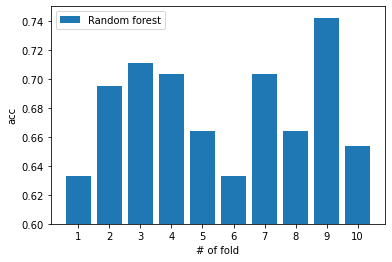

In [75]:

#show the feature importance
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

model_s = cross_val_score(clf, tr_X, tr_Y, cv=10)
#print the cross validation score
print("Cross validation score: %.2f" % model_s.mean())

#show the feature importance
plt.bar(range(1, 11), model_s, label='Random forest')
plt.xticks(range(1, 11))
plt.ylim(0.6, 0.75)
plt.legend()
plt.xlabel("# of fold")
plt.ylabel("acc")
plt.savefig("fig6.png", transparancy=True)

Shap of y_pred:  (320,)


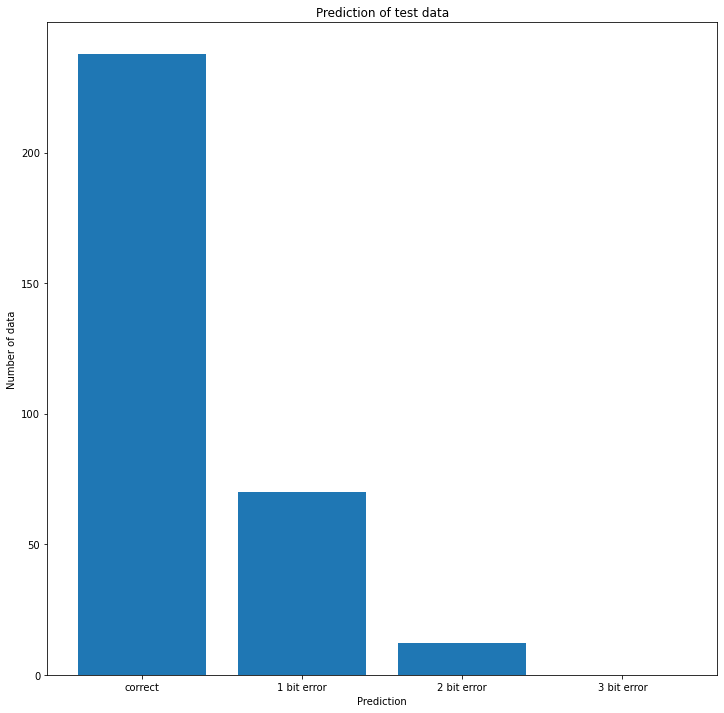

In [79]:
correct = 0
one_bit_error = 0
two_bit_error = 0
threemore_bit_error = 0
print('Shap of y_pred: ', te_Y.shape)
for i in range(len(pred_Y)):
    if pred_Y[i] == te_Y[i]:
        correct += 1
    elif abs(pred_Y[i] - te_Y[i]) == 1:
        one_bit_error += 1
    elif abs(pred_Y[i] - te_Y[i]) == 2:
        two_bit_error += 1
    else:
        threemore_bit_error += 1
plt.figure(figsize=(12, 12))
plt.bar(['correct', '1 bit error', '2 bit error', '3 bit error'], [correct, one_bit_error, two_bit_error, threemore_bit_error])
plt.title('Prediction of test data')
plt.xlabel('Prediction')
plt.ylabel('Number of data')
plt.show()